In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Sbopen, Pitch, VerticalPitch

In [2]:
parser = Sbopen()

In [3]:
df_comp = parser.competition()
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             74 non-null     int64 
 1   season_id                  74 non-null     int64 
 2   country_name               74 non-null     object
 3   competition_name           74 non-null     object
 4   competition_gender         74 non-null     object
 5   competition_youth          74 non-null     bool  
 6   competition_international  74 non-null     bool  
 7   season_name                74 non-null     object
 8   match_updated              74 non-null     object
 9   match_updated_360          56 non-null     object
 10  match_available_360        10 non-null     object
 11  match_available            74 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 6.1+ KB


In [4]:
pd.options.display.max_rows = df_comp.shape[0]+1
df_comp

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


###### competition ids with season name of 2024

In [27]:
df = df_comp[["competition_id", "season_id", "competition_name", "competition_gender", "season_name"]]
df.groupby("season_name")[["competition_name", "competition_gender", "competition_id", "season_id"]].apply(lambda x : x)

,,competition_name,competition_gender,competition_id,season_id
season_name,,,,,
1958,36,FIFA World Cup,male,43,269
1962,35,FIFA World Cup,male,43,270
1970,34,FIFA World Cup,male,43,272
1970/1971,20,Champions League,male,16,276
1971/1972,19,Champions League,male,16,71
1972/1973,18,Champions League,male,16,277
1973/1974,55,La Liga,male,11,278
1974,33,FIFA World Cup,male,43,51
1977,62,North American League,male,116,68


### So we'll choose season 2023/2024 index 0 i.e. 1. Bundesliga for analysis

###### competition_id = 9, season_id = 281

In [32]:
comp_id = 9
season_id = 281

In [38]:
df_match = parser.match(competition_id=comp_id, season_id=season_id)
pd.options.display.max_columns = df_match.shape[1]+1
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3895302,2024-04-14,2024-04-14 17:30:00,5,0,available,available,2024-05-10 16:57:53.017895,2024-05-10 17:03:59.613154,29,9,Germany,1. Bundesliga,281,2023/2024,904,Bayer Leverkusen,male,None,85,Germany,1000310,Xabier Alonso Olano,Xabi Alonso,1981-11-25,214,Spain,176,Werder Bremen,male,None,85,Germany,4057,Ole Werner,Ole Werner,1988-05-04,85,Germany,1.1.0,2,2,1,Regular Season,377,BayArena,85,Germany,234,Harm Osmers,85,Germany
1,3895292,2024-04-06,2024-04-06 15:30:00,0,1,available,available,2024-05-12 21:04:50.061716,2024-05-12 21:08:37.897296,28,9,Germany,1. Bundesliga,281,2023/2024,190,Union Berlin,male,None,85,Germany,176,Nenad Bjelica,Nenad Bjelica,1971-08-20,56,Croatia,904,Bayer Leverkusen,male,None,85,Germany,1000310,Xabier Alonso Olano,Xabi Alonso,1981-11-25,214,Spain,1.1.0,2,2,1,Regular Season,560,Stadion An der Alten Försterei,85,Germany,235,Benjamin Brand,85,Germany
2,3895333,2024-05-05,2024-05-05 18:30:00,1,5,available,available,2024-05-14 16:23:06.325967,2024-05-14 16:32:13.483516,32,9,Germany,1. Bundesliga,281,2023/2024,184,Eintracht Frankfurt,male,None,85,Germany,704,Dino Toppmöller,Dino Toppmöller,1980-11-23,85,Germany,904,Bayer Leverkusen,male,None,85,Germany,1000310,Xabier Alonso Olano,Xabi Alonso,1981-11-25,214,Spain,1.1.0,2,2,1,Regular Season,116458,Deutsche Bank Park,85,Germany,237,Christian Dingert,85,Germany
3,3895340,2024-05-12,2024-05-12 20:30:00,0,5,available,available,2024-05-14 10:09:25.875345,2024-05-14 16:46:08.459843,33,9,Germany,1. Bundesliga,281,2023/2024,868,Bochum,male,None,85,Germany,4849,Heiko Butscher,Heiko Butscher,1980-07-28,85,Germany,904,Bayer Leverkusen,male,None,85,Germany,1000310,Xabier Alonso Olano,Xabi Alonso,1981-11-25,214,Spain,1.1.0,2,2,1,Regular Season,550,Vonovia Ruhrstadion,85,Germany,235,Benjamin Brand,85,Germany
4,3895348,2024-05-18,2024-05-18 16:30:00,2,1,available,available,2024-05-20 10:11:27.857660,2024-05-20 10:33:09.140760,34,9,Germany,1. Bundesliga,281,2023/2024,904,Bayer Leverkusen,male,None,85,Germany,1000310,Xabier Alonso Olano,Xabi Alonso,1981-11-25,214,Spain,172,Augsburg,male,None,85,Germany,13,Jess Christian Thorup,Jess Christian Thorup,1970-02-21,61,Denmark,1.1.0,2,2,1,Regular Season,377,BayArena,85,Germany,837,Matthias Jöllenbeck,85,Germany
5,3895286,2024-03-30,2024-03-30 16:30:00,2,1,available,available,2024-05-08 03:31:41.834889,2024-05-08 03:36:21.320065,27,9,Germany,1. Bundesliga,281,2023/2024,904,Bayer Leverkusen,male,None,85,Germany,1000310,Xabier Alonso Olano,Xabi Alonso,1981-11-25,214,Spain,175,Hoffenheim,male,None,85,Germany,2938,Pellegrino Matarazzo,Pellegrino Matarazzo,1977-11-28,241,United States of America,1.1.0,2,2,1,Regular Season,377,BayArena,85,Germany,231,Deniz Aytekin,85,Germany
6,3895220,2024-02-03,2024-02-03 16:30:00,0,2,available,available,2024-05-08 01:00:41.665143,2024-05-08 01:01:15.978489,20,9,Germany,1. Bundesliga,281,2023/2024,872,Darmstadt 98,male,None,85,Germany,100,Torsten Lieberknecht,Torsten Lieberknecht,1973-08-01,85,Germany,904,Bayer Leverkusen,male,None,85,Germany,1000310,

In [39]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         34 non-null     int64         
 1   match_date                       34 non-null     datetime64[ns]
 2   kick_off                         34 non-null     datetime64[ns]
 3   home_score                       34 non-null     int64         
 4   away_score                       34 non-null     int64         
 5   match_status                     34 non-null     object        
 6   match_status_360                 34 non-null     object        
 7   last_updated                     34 non-null     datetime64[ns]
 8   last_updated_360                 34 non-null     datetime64[ns]
 9   match_week                       34 non-null     int64         
 10  competition_id                   34 non-null     int64         


In [44]:
df_match = df_match.sort_values("match_week")

We'll be analysing the games of only Bayer Leverkusen for the season 23-24

##### total games

In [45]:
match_ids = df_match.match_id.to_list()
no_games = len(match_ids)
match_ids

[3895052,
 3895060,
 3895067,
 3895074,
 3895086,
 3895095,
 3895107,
 3895113,
 3895121,
 3895134,
 3895139,
 3895153,
 3895158,
 3895167,
 3895180,
 3895182,
 3895194,
 3895202,
 3895210,
 3895220,
 3895232,
 3895244,
 3895250,
 3895258,
 3895266,
 3895275,
 3895286,
 3895292,
 3895302,
 3895309,
 3895320,
 3895333,
 3895340,
 3895348]

##### danger passes
###### Dangerous passes are those which fall in the time window of 15 seconds before a shot was taken by the team

for eaxample

In [50]:
m = match_ids[0]
df_event = parser.event(m)[0]
pd.options.display.max_columns = df_event.shape[1]+1
df_event.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,off_camera,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,out,under_pressure,shot_statsbomb_xg,end_z,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,pass_cross,aerial_won,dribble_nutmeg,foul_won_defensive,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,shot_first_time,pass_switch,dribble_overrun,ball_recovery_offensive,pass_miscommunication,ball_recovery_recovery_failure,pass_no_touch,pass_cut_back,pass_goal_assist,injury_stoppage_in_chain,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,shot_one_on_one
0,69bb4fa7-f177-49a8-9b19-7c01cd9d9a9c,1,1,00:00:00,0,0,1,0.000000,3895052,35,Starting XI,904,Bayer Leverkusen,1,Regular Play,904,Bayer Leverkusen,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9790a466-9c56-42aa-96aa-a9ad1a6f8811,2,1,00:00:00,0,0,1,0.000000,3895052,35,Starting XI,904,Bayer Leverkusen,1,Regular Play,182,RB Leipzig,442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c6762724-3ad0-4ed1-b232-7f32ac192ec6,3,1,00:00:00,0,0,1,0.000000,3895052,18,Half Start,904,Bayer Leverkusen,1,Regular Play,904,Bayer Leverkusen,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ba22283a-c920-448c-804e-3737cccd9fff,4,1,00:00:00,0,0,1,0.000000,3895052,18,Half Start,904,Bayer Leverkusen,1,Regular Play,182,RB Leipzig,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9a50295b-7f7a-449c-9ef3-87e60467e8e1,5,1,00:00:00,0,0,2,0.321221,3895052,30,Pass,182,RB Leipzig,9,From Kick Off,182,RB Leipzig,None,1.0,16275.0,Ikoma Loïs Openda,22.0,Right Center Forward,16532.0,Daniel Olmo Carvajal,4.060788,2.968347,1.0,Ground Pass,57.0,40.8,40.0,Right Foot,65.0,Kick Off,61.0,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
team_name = "Bayer Leverkusen"
danger_passes = pd.DataFrame()
for idx in match_ids:
    df = parser.event(idx)[0]
    for period in [1, 2]:
        mask_pass = (df.team_name == team_name) & (df.type_name == "Pass") & (df.period == period) & (df.outcome_name.isnull()) & (df.sub_type_name.isnull())
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
        mask_shot = (df.team_name == team_name) & (df.type_name == "Shot") & (df.period == period)
        shots = df.loc[mask_shot, ["minute", "second"]]
        shot_times = shots["minute"]*60+shots["second"]
        shot_window = 15
        shot_start = shot_times - shot_window
        shot_start = shot_start.apply(lambda x: x if x>0 else (period-1)*45)
        pass_times = passes["minute"]*60+passes["second"]
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x > shot_times)).unique())
        danger_passes_period = passes.loc[pass_to_shot]
        danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index=True)
        

danger_passes.head()

,x,y,end_x,end_y,minute,second,player_name
0,92.4,64.4,92.4,72.8,2,18,Jonas Hofmann
1,81.7,57.0,88.0,58.4,3,10,Granit Xhaka
2,86.0,58.8,66.7,36.3,3,11,Florian Wirtz
3,84.7,20.6,97.2,5.1,3,16,Edmond Fayçal Tapsoba
4,97.2,5.7,76.9,4.9,3,20,Alejandro Grimaldo García


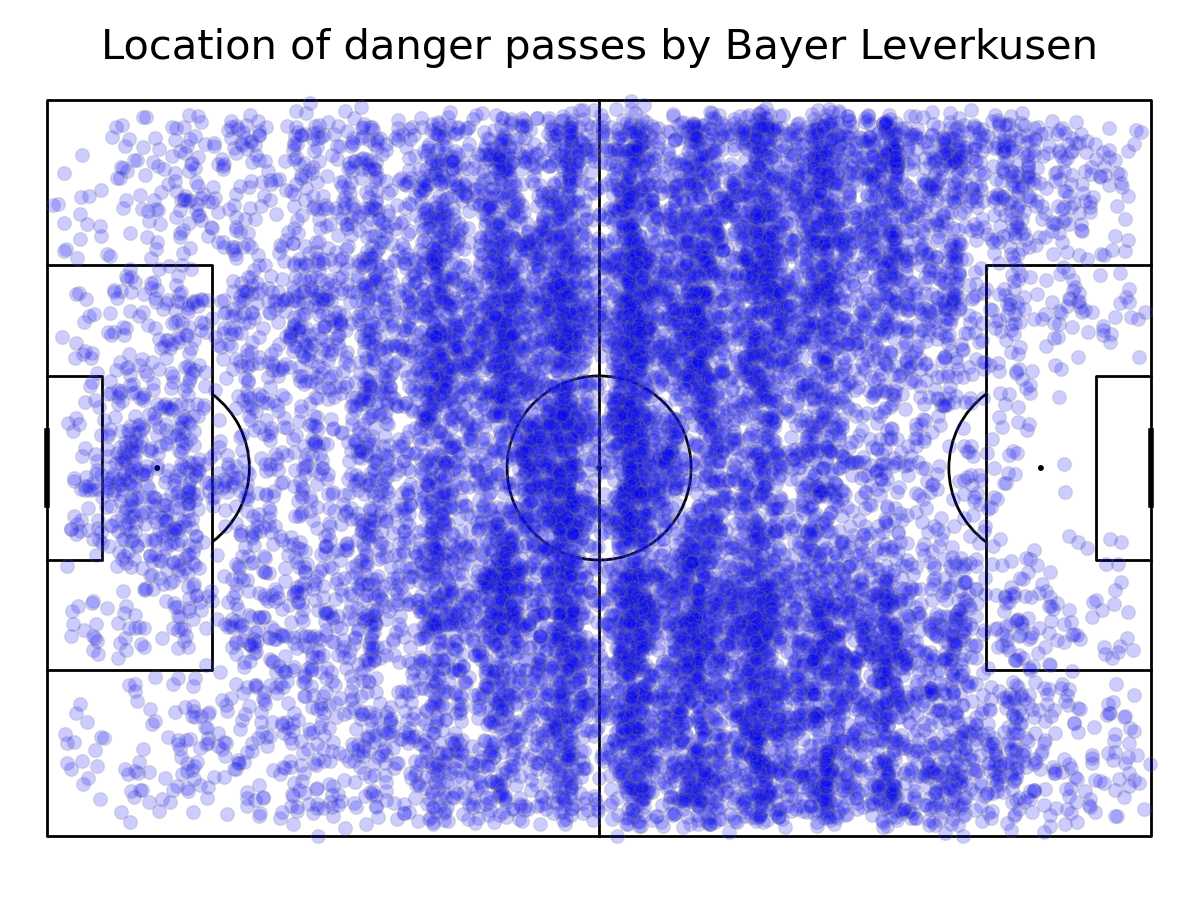

In [55]:
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
fig.suptitle('Location of danger passes by ' + team_name, fontsize = 30)
plt.show()

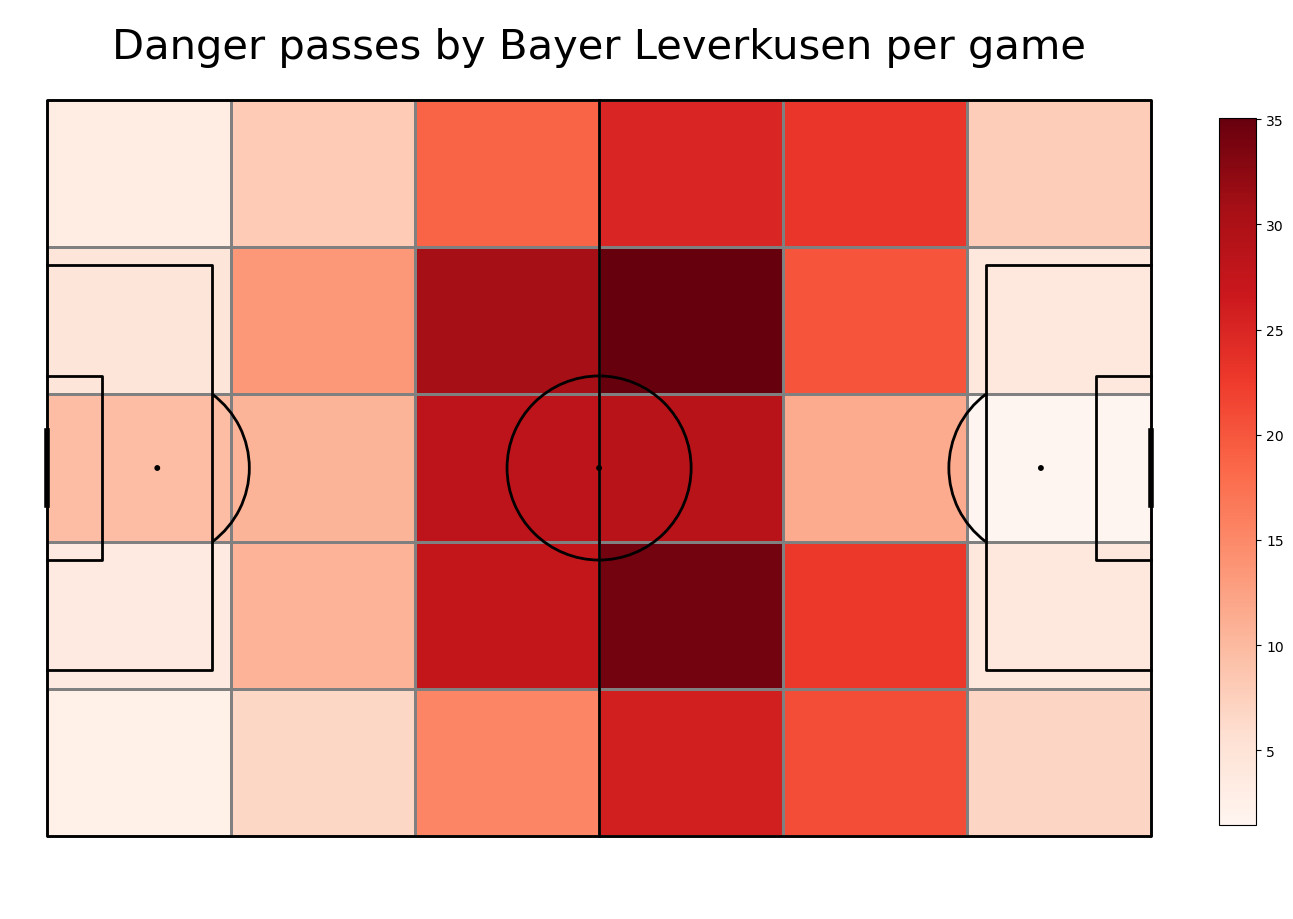

In [56]:
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by ' + team_name + " per game", fontsize = 30)
plt.show()